## Goal: Determine distributions of variables for the flash drougth project

In this notebook, we determine how the variables for the indices are distributed, in order to fit the right distribution in the standarization process. 

### The indexes we need are: 

- SPI standardized precipitation index. Variable: **precipitation**
- SPEI standardized precipitation/evapotranspiration index. Variable: **precipitation - potential evapotranspiration**
- ESI/SESR evaporative stress index/standardized evaporative stress ratio. Variable: **evapotranspiration/potential evapotranspiration**
- SMI soil moisture index. Variable: **soil moisture**



In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [53]:
# check deze als de data er is
def read_in_ERA5(var, diri, basin):
    ds = xr.open_mfdataset(f'{diri}/{var}_{basin}_198*_noleap.nc') #.convert_calendar('noleap',use_cftime=False)
    da = ds[var]
    return da



In [31]:


# check deze als de data er is
def read_in_ERA5(var, diri, basin):
    ds = xr.open_mfdataset(f'{diri}/{var}_{basin}_198*.nc').convert_calendar('noleap')
    da = ds[var]


    df = da.to_dataframe()
    ds.close()

    # df.reset_index(inplace=True)
    # df['year'] = df.time.map(lambda x: x.year)
    # df['month'] = df.time.map(lambda x: x.month)
    # df['day'] = df.time.map(lambda x: x.day)
    return df

In [43]:
ds = xr.open_mfdataset(f'{diri}/{var}_{basin}_198*.nc').convert_calendar('noleap').to_datetime()

OSError: no files to open

In [32]:
def make_index_timeseries(var, diri,basin):
    if var == 'pr' or var == 'mrsos':
        da = read_in_ERA5(var, diri, basin)
    elif var == 'wb':
        da_pr = read_in_ERA5('pr', diri, basin)
        da_pet = read_in_ERA5('pet', diri, basin)
        da = da_pr - da_pet
    elif var == 'es':
        da_et = read_in_ERA5('et', diri, basin)
        da_pet = read_in_ERA5('pet', diri, basin)
        da = da_et / da_pet        
    return da


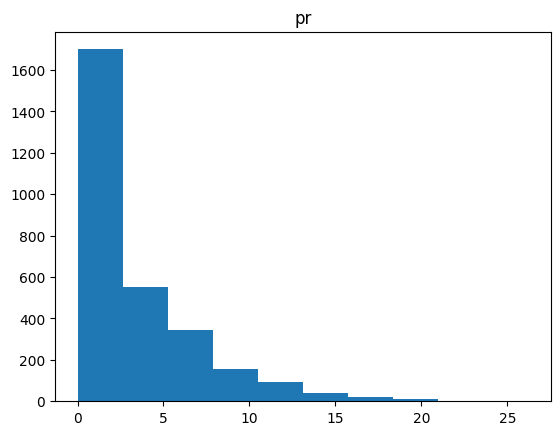

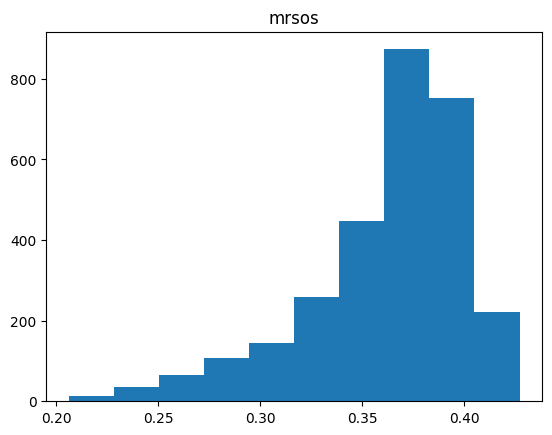

/usr/local/apps/python3/3.10.10-01/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6715: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/apps/python3/3.10.10-01/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6716: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

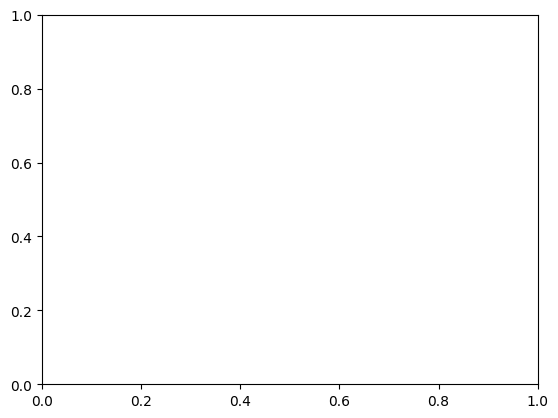

In [33]:
basin = 'Rhine'
diri='/scratch/nkkw/Karin/P2_flashdroughts/meteodata_ERA5/'


for var in ['pr','mrsos','wb','es']:
    da = make_index_timeseries(var, diri,basin)
    plt.hist(da)
    plt.title(var)
    plt.show()


In [42]:
da = make_index_timeseries('pr', diri,basin)

ValueError: Calendar 'noleap' is only valid with cftime. Try using `use_cftime=True`.

In [38]:
da

,pr
time,
1980-01-01 11:00:00,1.699819
1980-01-02 11:00:00,3.263706
1980-01-03 11:00:00,2.381802
1980-01-04 11:00:00,7.551279
1980-01-05 11:00:00,5.150978
...,...
1987-12-27 11:00:00,0.138610
1987-12-28 11:00:00,0.150631
1987-12-29 11:00:00,0.158562


TypeError: float() argument must be a string or a real number, not 'cftime._cftime.DatetimeNoLeap'

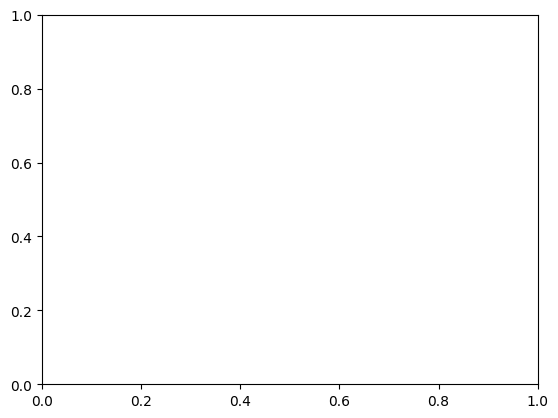

In [39]:
plt.plot(da)

In [47]:
var='pr'
ds = xr.open_mfdataset(f'{diri}/{var}_{basin}_198*.nc').convert_calendar('noleap')

In [50]:
ds[var].to_datetime()

AttributeError: 'DataArray' object has no attribute 'to_datetime'

In [52]:
ds[var].time.to_datetime()

AttributeError: 'DataArray' object has no attribute 'to_datetime'

In [54]:
da = read_in_ERA5(var, diri, basin)

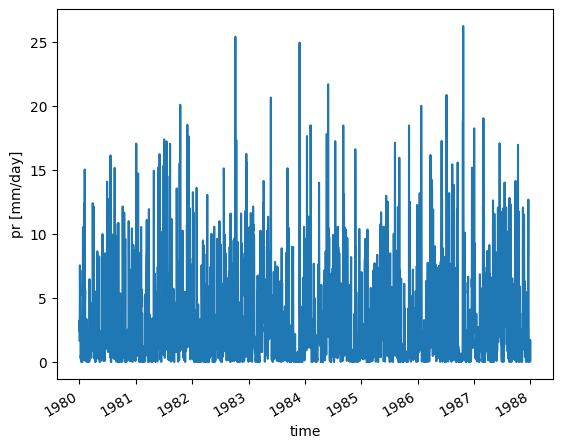

In [55]:
da.plot()

In [58]:
da.time[0:60]

<xarray.DataArray 'time' (time: 60)>
array(['1980-01-01T11:00:00.000000000', '1980-01-02T11:00:00.000000000',
       '1980-01-03T11:00:00.000000000', '1980-01-04T11:00:00.000000000',
       '1980-01-05T11:00:00.000000000', '1980-01-06T11:00:00.000000000',
       '1980-01-07T11:00:00.000000000', '1980-01-08T11:00:00.000000000',
       '1980-01-09T11:00:00.000000000', '1980-01-10T11:00:00.000000000',
       '1980-01-11T11:00:00.000000000', '1980-01-12T11:00:00.000000000',
       '1980-01-13T11:00:00.000000000', '1980-01-14T11:00:00.000000000',
       '1980-01-15T11:00:00.000000000', '1980-01-16T11:00:00.000000000',
       '1980-01-17T11:00:00.000000000', '1980-01-18T11:00:00.000000000',
       '1980-01-19T11:00:00.000000000', '1980-01-20T11:00:00.000000000',
       '1980-01-21T11:00:00.000000000', '1980-01-22T11:00:00.000000000',
       '1980-01-23T11:00:00.000000000', '1980-01-24T11:00:00.000000000',
       '1980-01-25T11:00:00.000000000', '1980-01-26T11:00:00.000000000',
       '1980-01-27T11:00:00.000000000', '1980-01-28T11:00:00.000000000',
       '1980-01-29T11:00:00.000000000', '1980-01-30T11:00:00.000000000',
       '1980-01-31T11:00:00.000000000', '1980-02-01T11:00:00.000000000',
       '1980-02-02T11:00:00.000000000', '1980-02-03T11:00:00.000000000',
       '1980-02-04T11:00:00.000000000', '1980-02-05T11:00:00.000000000',
       '1980-02-06T11:00:00.000000000', '1980-02-07T11:00:00.000000000',
       '1980-02-08T11:00:00.000000000', '1980-02-09T11:00:00.000000000',
       '1980-02-10T11:00:00.000000000', '1980-02-11T11:00:00.000000000',
       '1980-02-12T11:00:00.000000000', '1980-02-13T11:00:00.000000000',
       '1980-02-14T11:00:00.000000000', '1980-02-15T11:00:00.000000000',
       '1980-02-16T11:00:00.000000000', '1980-02-17T11:00:00.000000000',
       '1980-02-18T11:00:00.000000000', '1980-02-19T11:00:00.000000000',
       '1980-02-20T11:00:00.000000000', '1980-02-21T11:00:00.000000000',
       '1980-02-22T11:00:00.000000000', '1980-02-23T11:00:00.000000000',
       '1980-02-24T11:00:00.000000000', '1980-02-25T11:00:00.000000000',
       '1980-02-26T11:00:00.000000000', '1980-02-27T11:00:00.000000000',
       '1980-02-28T11:00:00.000000000', '1980-03-01T11:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T11:00:00 ... 1980-03-01T11:00:00
Attributes:
    standard_name:  time
    axis:           T

In [59]:
len(da)

2920

In [60]:
365*8

2920